<a href="https://colab.research.google.com/github/JulianaFanni/datascience/blob/main/JulianaFanni_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Juliana Fanni - Análise de Dados e Boas Práticas

MVP de Análise de Dados e Boas Práticas

Profs. Tatiana Escovedo e Hugo Villamizar

Aluna: Juliana Cardozo Pereira Fanni

## 1. Definição do Problema

A instituição é uma organização que tem como objetivo projetos de pesquisas científicas na área de saúde. Uma vez comprovadas a segurança e a eficácia do produto na fase pré-clínica, iniciam-se as pesquisas em seres humanos. As pessoas se voluntariam para participar de ensaios clínicos para testar as intervenções médicas, incluindo drogas, células e outros produtos, chamados de pesquisados. No entanto , após uma análise dos pesquisados nas pesquisas identificou um alto número de **Falha de Triagem**  no status dos pesquisados, ou seja, um voluntário que não se enquadrou adequadamente ao projeto de pesquisa causando grande impacto financeiro e no prazo dos projetos.


Diante do acima exposto, o objetivo deste trabalho é prever se um voluntário à um projeto de pesquisa se enquadra ao perfil de estudo do projeto de pesquisa. Para este MVP, focarei nos critérios de enquadramento dos projetos de pesquisa de Ancogenética, pois cada projeto possui critérios de perfil de pesquisado especifico.

O dataset usado neste projeto será o próprio da instituição e o conjunto de dados foi extraído para uma planilha excel a partir de um sistema interno e de acesso restrito, no entanto todos os dados dos pesquisados e o nome das pesquisas foram alterados tendo assim os direitos garantidos pela lgpd e dos próprios projetos de pesquisa da empresa.




---

**Dicionário de dados:**

- **Participante**: Indentificação do participante no sistema.
-	**Idade**: Idade do participante.
- **Sexobiologico**: Sexo de nascimento do participante.

  Sendo:
    1	-Masculino;
    2- Feminino
- **Estadocivil**: Estado civil do participante.

  Sendo:
    1- Solteiro(a);
    2- Casado(a);
    3- Divorciado(a)/Separado(a);
    4- Viúvo(a)

- **fumante**: Indicativo se o participante é fumante.

 Sendo:
    1	-Sim;
    2- Não

- **fumante_anos**: Caso o participante seja um fumante indica o tempo.
- **bebida_alcool**: Indica se o participante ingere alguma bebida alcoólica.

 Sendo:
    1	-Sim;
    2- Não

- **atividade_fisica**: Indica se o participante faz alguma atividade física.

 Sendo:
    1	-Sim;
    2- Não

- **diagnostico_cancer**: Indica se o participante já teve diagnostico de Câncer

 Sendo:
    1	-Sim;
    2- Não

- **historico_cancer_familia**: Indica se o participante tem histórico de Câncer na família

 Sendo:
    1	-Sim;
    2- Não
    
- **teste_genetico**: indica se o participante já realizou o teste genético

 Sendo:
    1	-Sim;
    2- Não




---



**Importando as bibliotecas necessárias**

In [2]:
# Carrega bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ignornar os warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
## Verifica a versão da matplotlib instalada
mpl.__version__

'3.7.1'

## 2. Carga de Dados

Neste processo irei disponibilizar informações relevantes e usarei o pacote Pandas que irá carregar o arquivo "Participantes.csv", para a transformação de dados brutos em informações valiosas e prontas para análise e exploração. A carga eficiente desses dados é essencial para o início do processo de análise.

In [4]:
# Carrega arquivo csv usando Pandas usando uma URL e hospedado em meu Github

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/JulianaFanni/datascience/main/Participantes.csv"

# Informa o cabeçalho das colunas
colunas = ['Participante',	'Idade' , 'Sexobiologico',
           'Estadocivil',	'fumante',	'fumante_anos', 'bebida_alcool' ,
           'atividade_fisica', 'diagnostico_cancer',	'historico_cancer_familia' ,	'teste_genetico', 'output']


# Carregando dados do arquivo CSV para um DataSet , lendo o arquivo CSV utilizando as colunas informadas delimitadas por ","
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Exibir as primeiras linhas usando head()
dataset.head()

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
0,4,63,1,2,3,0,1.0,2,2,1,1,1
1,5,37,1,2,2,21,1.0,2,1,2,1,1
2,11,41,1,2,1,0,2.0,2,2,1,1,1
3,12,56,1,2,1,0,2.0,2,1,2,1,1
4,14,57,2,2,1,0,2.0,2,1,2,1,1


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

A primeira análise será examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [5]:
# Mostra as dimensões do dataset, ou seja quantidade de linhas e colunas
print(dataset.shape)

(3217, 12)


Meu dataset mostrou ter:
- 3218 linhas
- 16 colunas (campos)

In [6]:
# Verificar os tipos dos atributos do banco importado
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Participante              3217 non-null   int64  
 1   Idade                     3217 non-null   int64  
 2   Sexobiologico             3217 non-null   int64  
 3   Estadocivil               3217 non-null   int64  
 4   fumante                   3217 non-null   int64  
 5   fumante_anos              3217 non-null   int64  
 6   bebida_alcool             730 non-null    float64
 7   atividade_fisica          3217 non-null   int64  
 8   diagnostico_cancer        3217 non-null   int64  
 9   historico_cancer_familia  3217 non-null   int64  
 10  teste_genetico            3217 non-null   int64  
 11  output                    3217 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 301.7 KB
None


Agora irei analisar os primeiros registros, como o dataset tem mais de 3mil registros irei analisar os 50 primeiros e as 50 últimas.

In [7]:
#  Exibir as 50 primeiras linhas usando head()
dataset.head(50)

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
0,4,63,1,2,3,0,1.0,2,2,1,1,1
1,5,37,1,2,2,21,1.0,2,1,2,1,1
2,11,41,1,2,1,0,2.0,2,2,1,1,1
3,12,56,1,2,1,0,2.0,2,1,2,1,1
4,14,57,2,2,1,0,2.0,2,1,2,1,1
5,16,57,2,2,1,0,2.0,2,1,2,0,1
6,17,56,2,2,1,0,2.0,2,2,2,0,1
7,18,44,2,2,1,0,2.0,2,2,2,1,1
8,19,52,1,2,2,29,1.0,2,1,2,1,1
9,20,57,1,2,2,32,1.0,2,1,2,1,1


In [8]:
# comando que lê as 50 últimas linhas do dataset
dataset.tail(50)

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
3167,3282,36,1,2,1,0,NaN,2,1,2,0,0
3168,3283,40,1,2,1,0,NaN,2,1,2,0,0
3169,3284,40,1,2,1,0,NaN,2,1,2,1,0
3170,3285,39,1,2,1,0,NaN,2,1,2,1,0
3171,3286,31,1,2,1,0,NaN,2,1,2,1,0
3172,3287,45,1,2,2,25,NaN,2,1,2,1,0
3173,3288,41,1,2,1,0,NaN,2,1,2,1,0
3174,3289,43,1,2,1,0,NaN,2,1,2,1,0
3175,3290,29,1,2,1,0,NaN,2,1,2,1,0
3176,3291,40,1,2,1,0,NaN,2,1,2,1,0


Verificando os tipos dos atributos do banco importado. Se os atributos possuem o tipo correto.

In [9]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Participante                  int64
Idade                         int64
Sexobiologico                 int64
Estadocivil                   int64
fumante                       int64
fumante_anos                  int64
bebida_alcool               float64
atividade_fisica              int64
diagnostico_cancer            int64
historico_cancer_familia      int64
teste_genetico                int64
output                        int64
dtype: object

In [10]:
# describe fornece algumas estatísticas descritivas
dataset.describe

<bound method NDFrame.describe of       Participante  Idade  Sexobiologico  Estadocivil  fumante  fumante_anos  \
0                4     63              1            2        3             0   
1                5     37              1            2        2            21   
2               11     41              1            2        1             0   
3               12     56              1            2        1             0   
4               14     57              2            2        1             0   
...            ...    ...            ...          ...      ...           ...   
3212          3327     40              1            2        1             0   
3213          3328     51              1            2        1             0   
3214          3329     23              1            2        1             0   
3215          3330     47              1            2        1             0   
3216          3331     39              1            2        1             0   

     

In [11]:
# algumas estatísticas descritivas em outra visão, transposta
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Participante,3217.0,1677.278520,955.969042,4.0,853.0,1674.0,2505.0,3331.0
Idade,3217.0,52.751943,13.971364,19.0,42.0,52.0,62.0,105.0
Sexobiologico,3217.0,1.056574,0.231064,1.0,1.0,1.0,1.0,2.0
Estadocivil,3217.0,1.890270,0.469951,1.0,2.0,2.0,2.0,4.0
fumante,3217.0,1.324837,0.574528,1.0,1.0,1.0,2.0,3.0
fumante_anos,3217.0,6.065900,12.154990,0.0,0.0,0.0,0.0,58.0
bebida_alcool,730.0,1.698630,0.459168,1.0,1.0,2.0,2.0,2.0
atividade_fisica,3217.0,2.000933,0.088163,1.0,2.0,2.0,2.0,3.0
diagnostico_cancer,3217.0,1.312092,0.463419,1.0,1.0,1.0,2.0,2.0
historico_cancer_familia,3217.0,1.696301,0.459926,1.0,1.0,2.0,2.0,2.0


In [12]:
# Verificando se existe valores ausentes
dataset.isna().sum()/len(dataset)*100

Participante                 0.000000
Idade                        0.000000
Sexobiologico                0.000000
Estadocivil                  0.000000
fumante                      0.000000
fumante_anos                 0.000000
bebida_alcool               77.308051
atividade_fisica             0.000000
diagnostico_cancer           0.000000
historico_cancer_familia     0.000000
teste_genetico               0.000000
output                       0.000000
dtype: float64

Verificarei se o dataset tem o indicador de câncer positivo está balanceado, caso exista será tratado  o desbalanceamento. O output cancer positivo 0 (não ocorrência de câncer) e 1 (ocorrência de câncer) . Caso exista, um tratamento será realizado posteriormente.

In [13]:
# distribuição das classes
print(dataset.groupby('output').size())

output
0    1609
1    1608
dtype: int64


### 3.2. Visualizações Unimodais

Nesta etapa, vou criar um histograma para cada atributo com o banco de dados sem nenhum tratamento ou ajuste, que irá permitir conhecer a distribuição individual de cada fator cancerigeno.

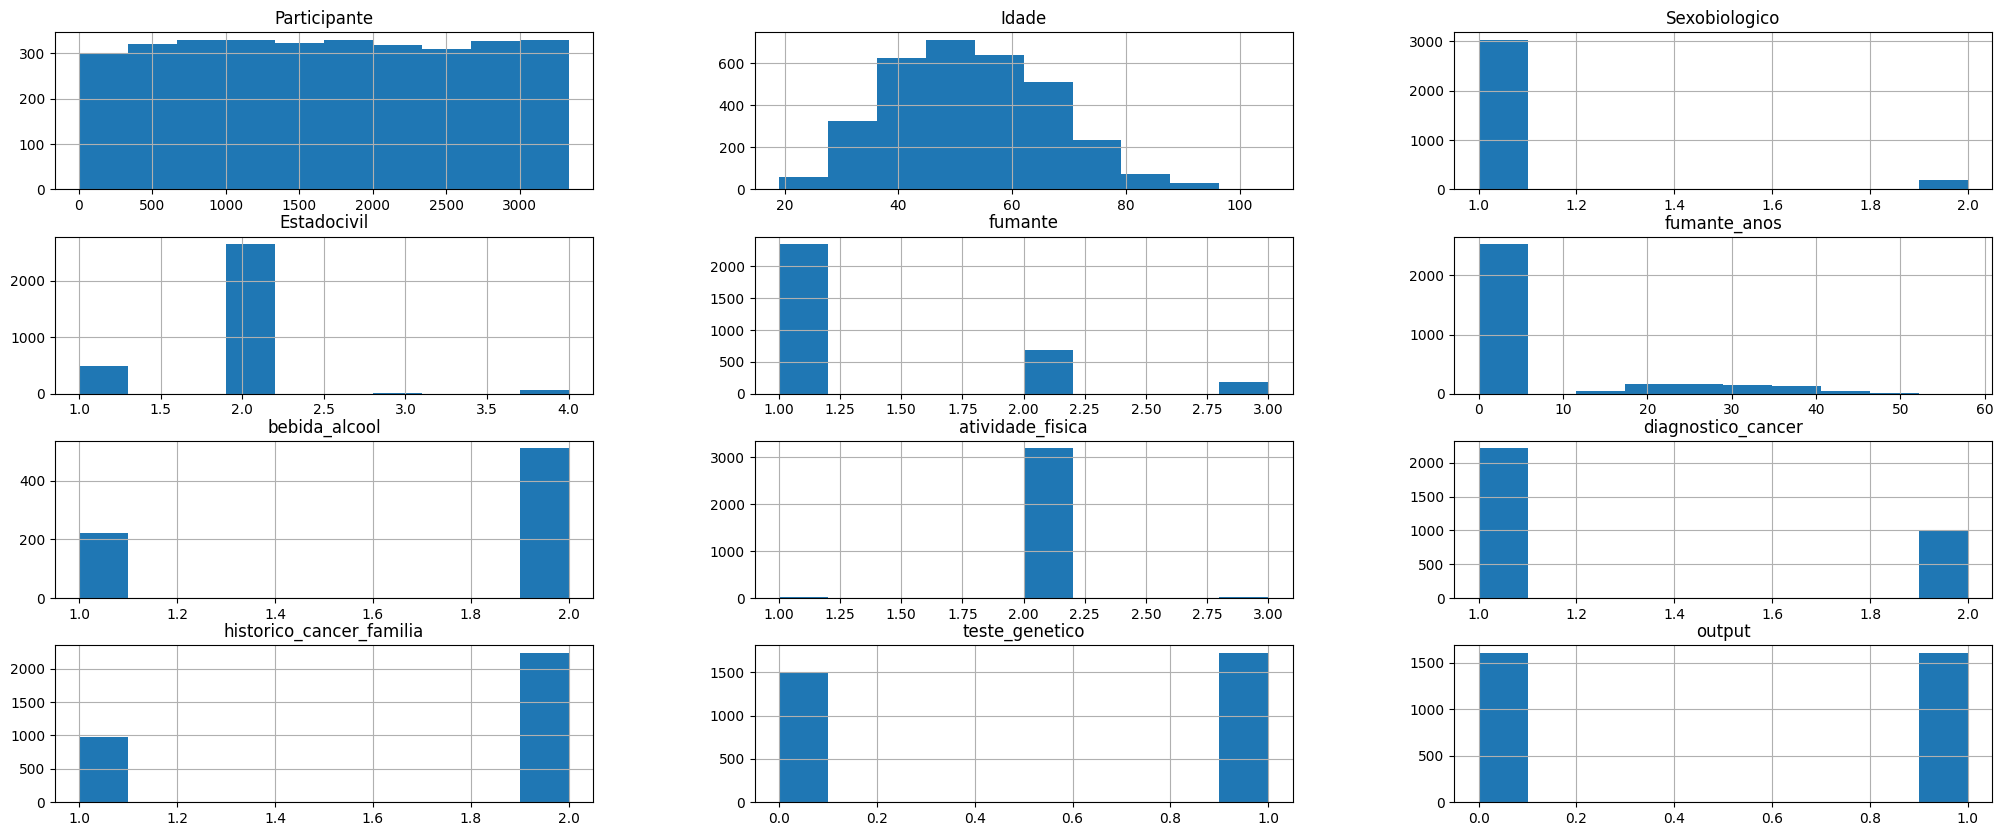

In [14]:
# Exibir o Histograma dos dados do dataset
dataset.hist(figsize = (25,10))
plt.show()

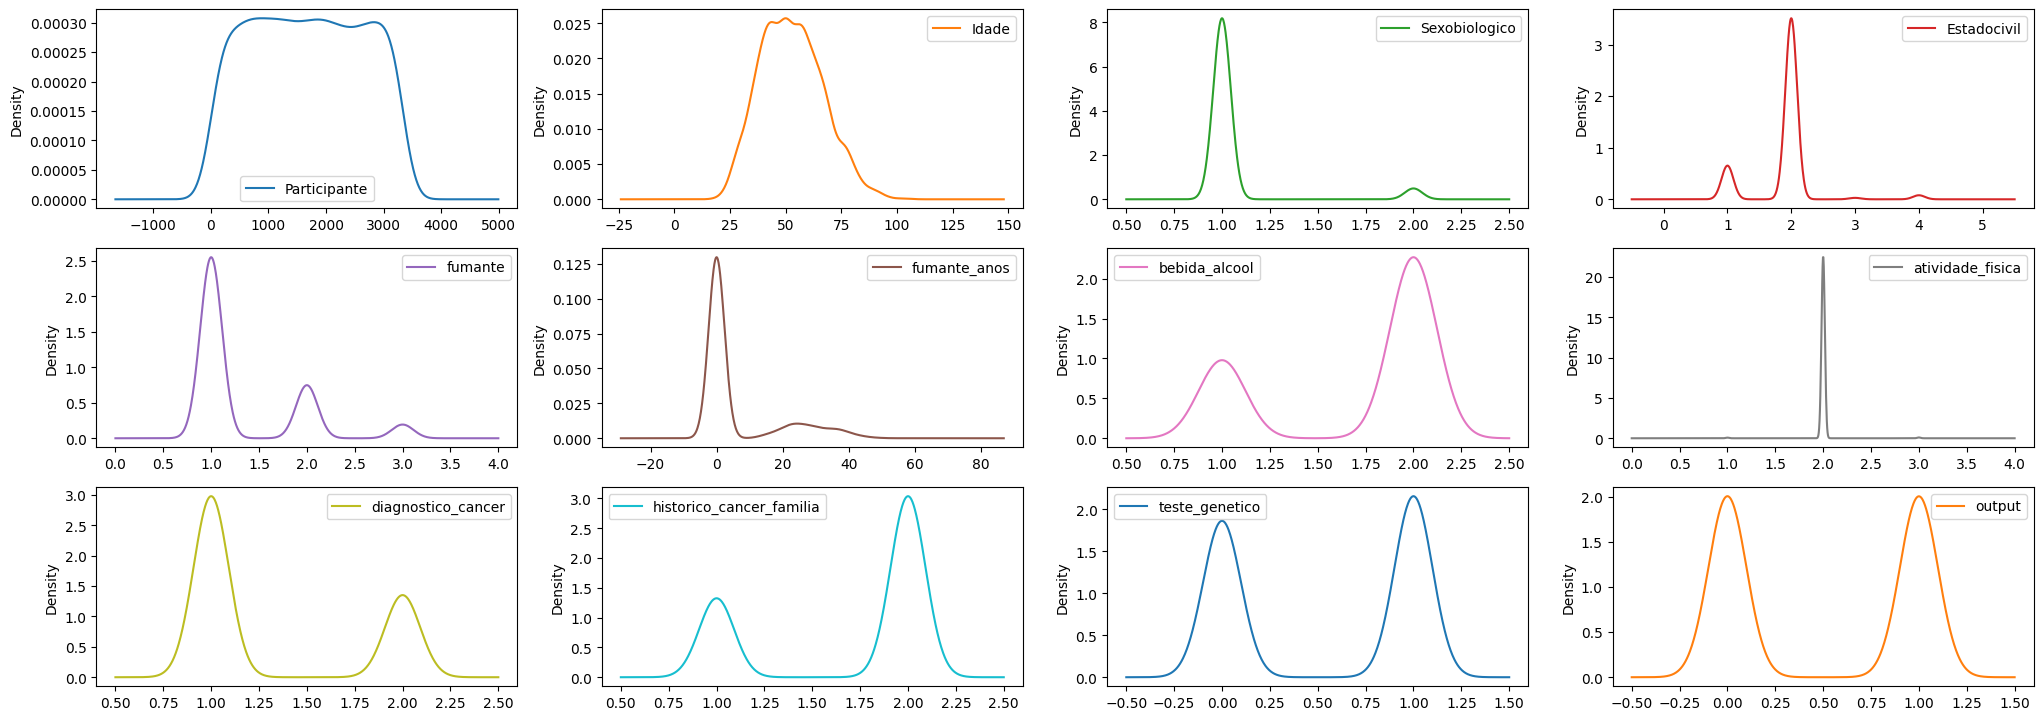

In [15]:
# Exibir o Gráfico de densidade dos dados do dataset
dataset.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, figsize = (25,15))
plt.show()


Agora irei analisar com boxplots. O boxplot me permitirá avaliar a dispersão dos dados, indicando a variabilidade e a presença de valores extremos.

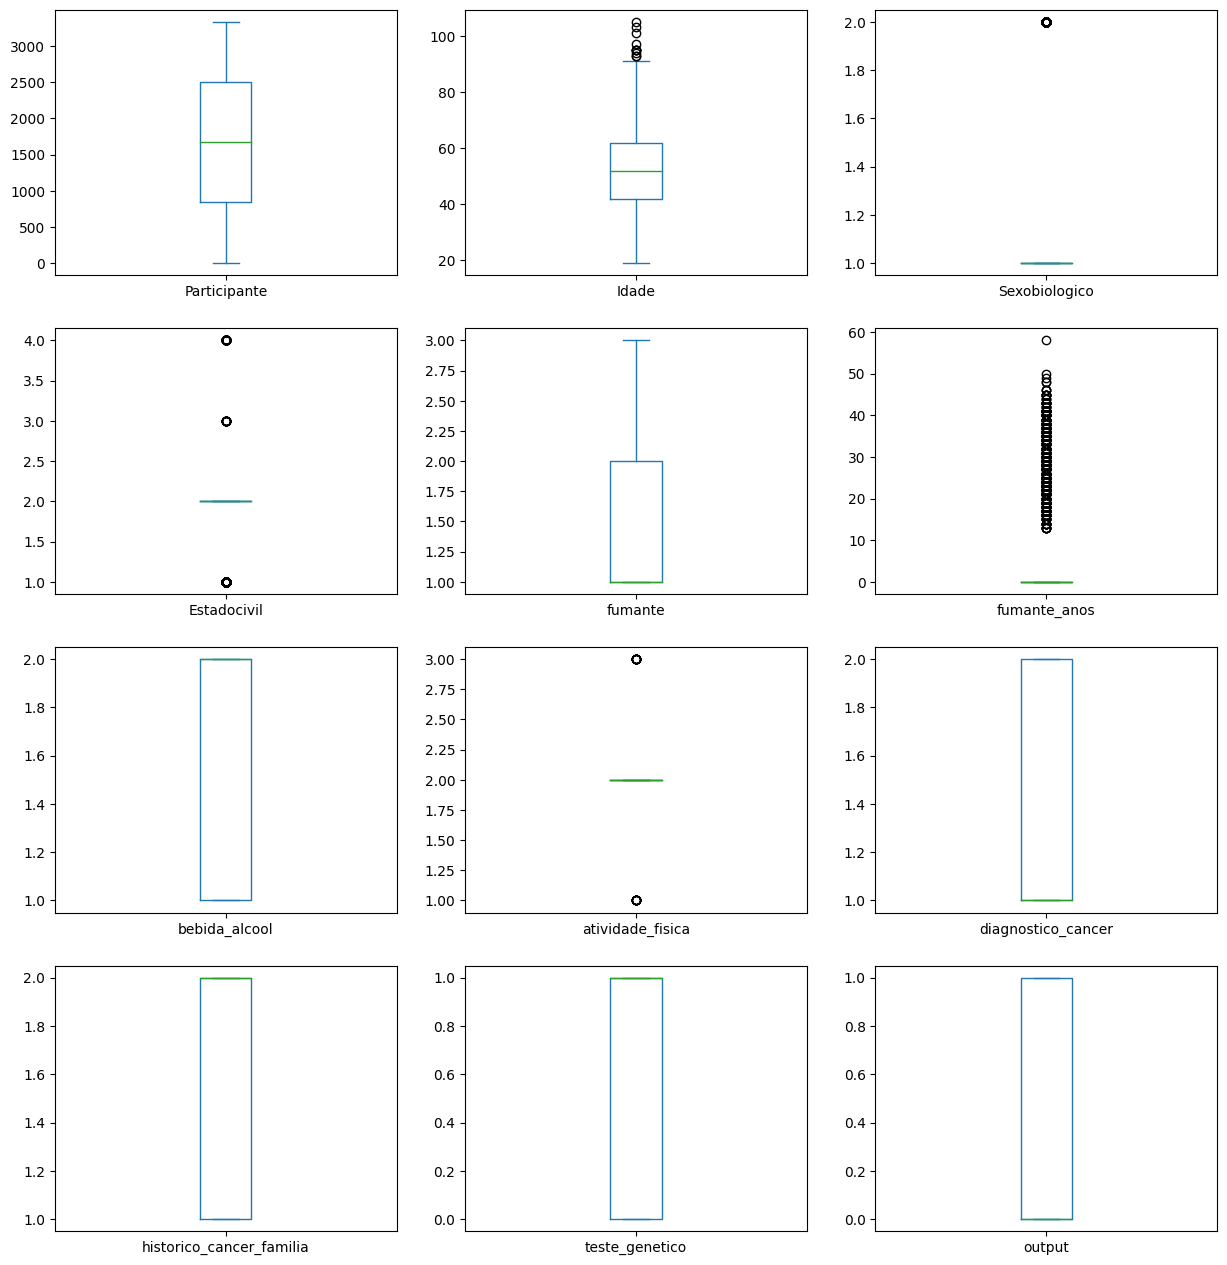

In [16]:
# Exibir o boxplots dos dados do dataset
dataset.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (15,20))
plt.show()

Ao utilizar boxplots, pude rapidamente ter uma visão geral da distribuição de dados e tomar decisões informadas sobre o tratamento de outliers, comparação de grupos e compreensão da variabilidade dos dados.

### 3.3. Visualizações Multimodais

Farei uma analise multimodal devido aos dados dispersos e assim identificar a correlação nos atributos.

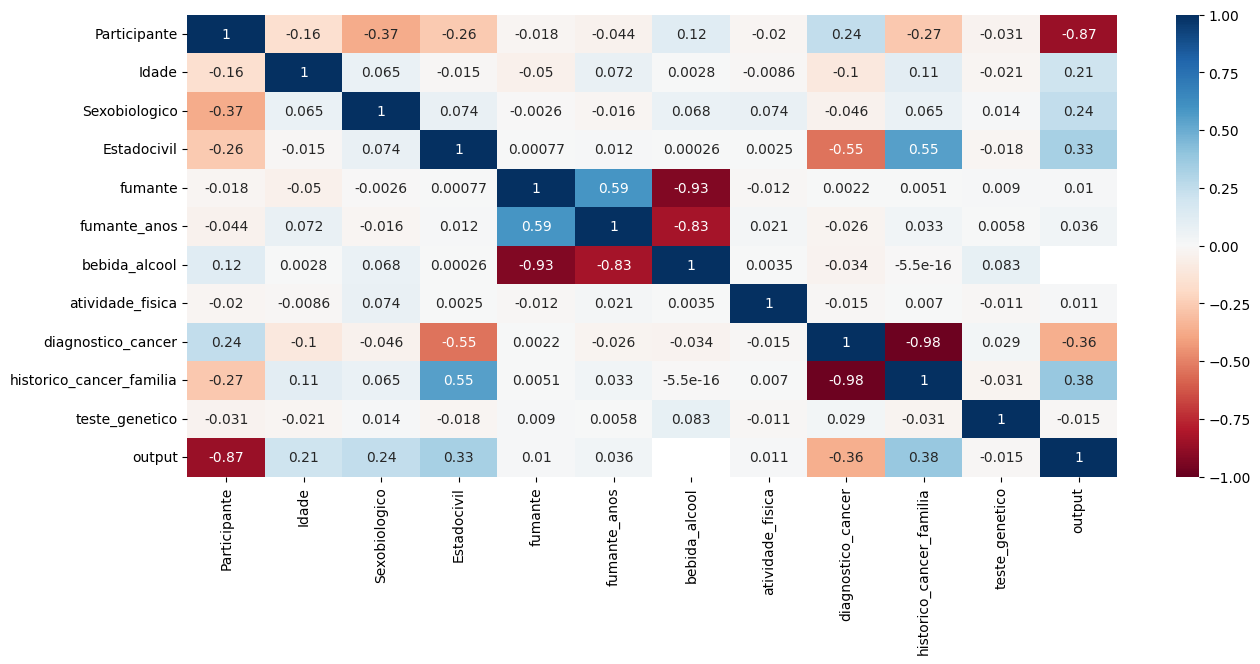

In [17]:
# Exibir a Matriz de Correlação com Seaborn
plt.figure(figsize = (15,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

 **Correlação negativa**

> fumante_anos x bebida_anos : -0.83

> historico_cancer_familiar x diagnostico_cancer : -0.98

 **Correlação Positiva**

> fumante_anos x fumante : 0.059






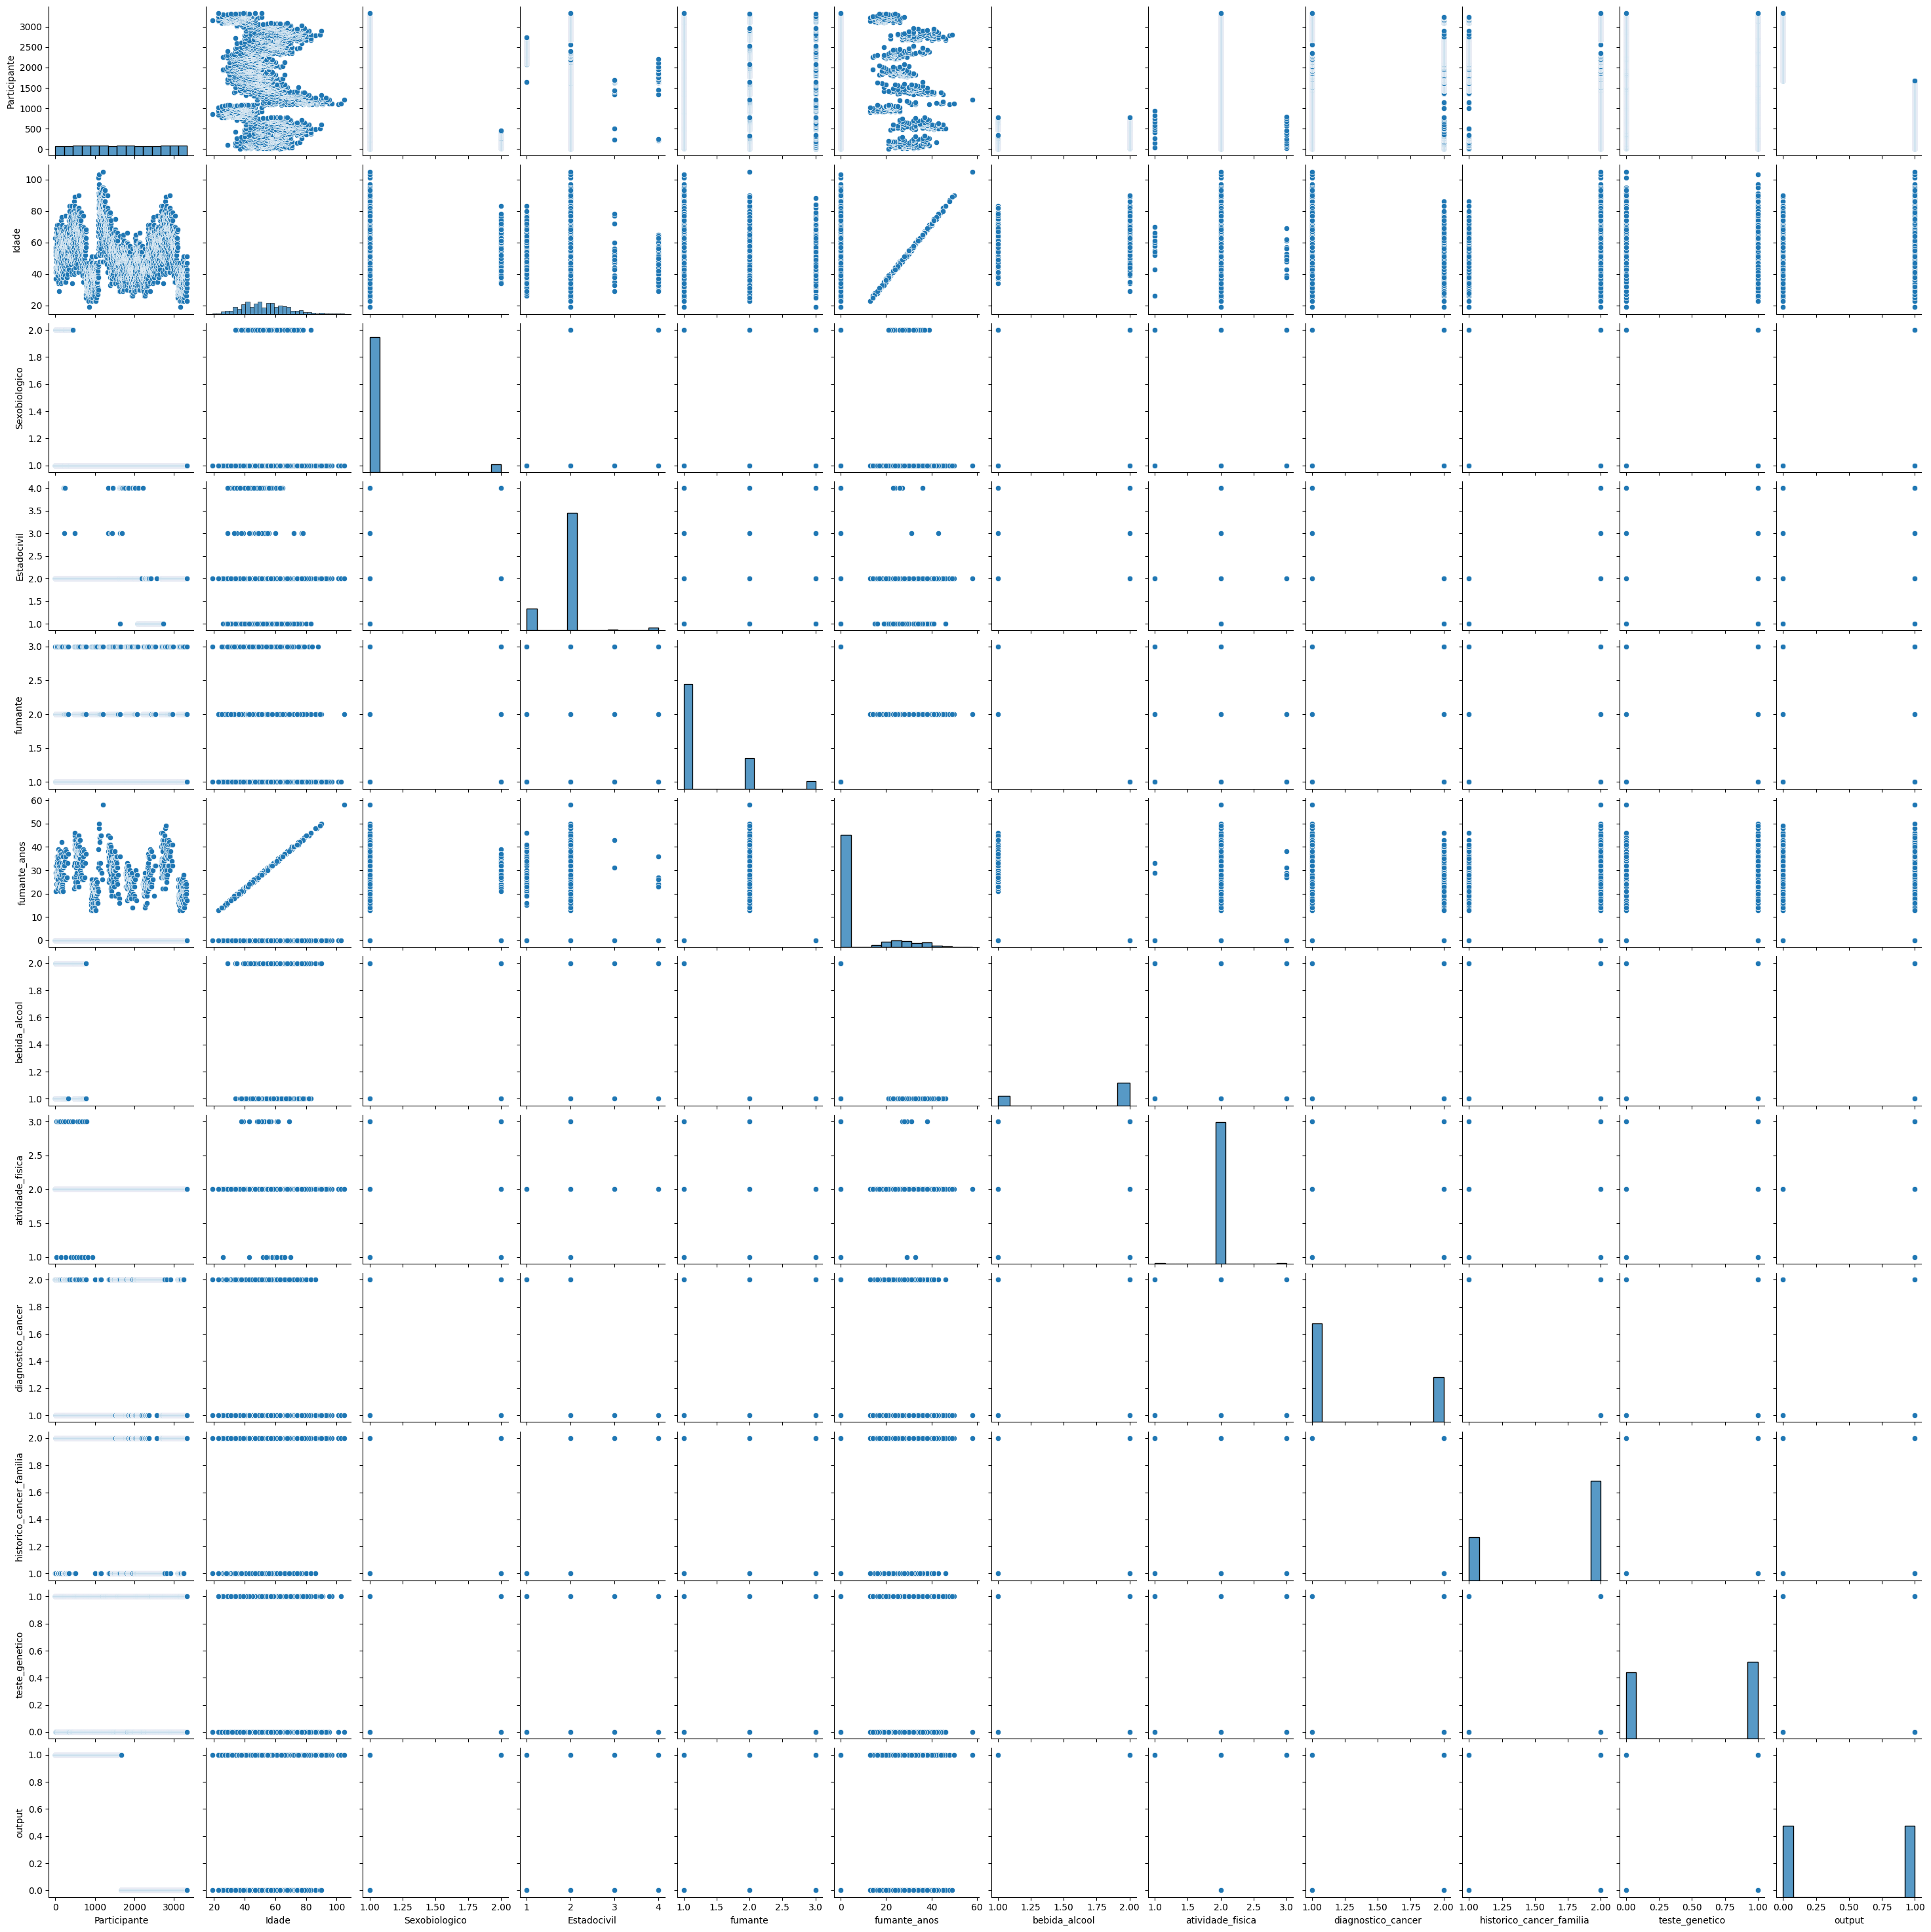

In [18]:
# Exibir Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset)

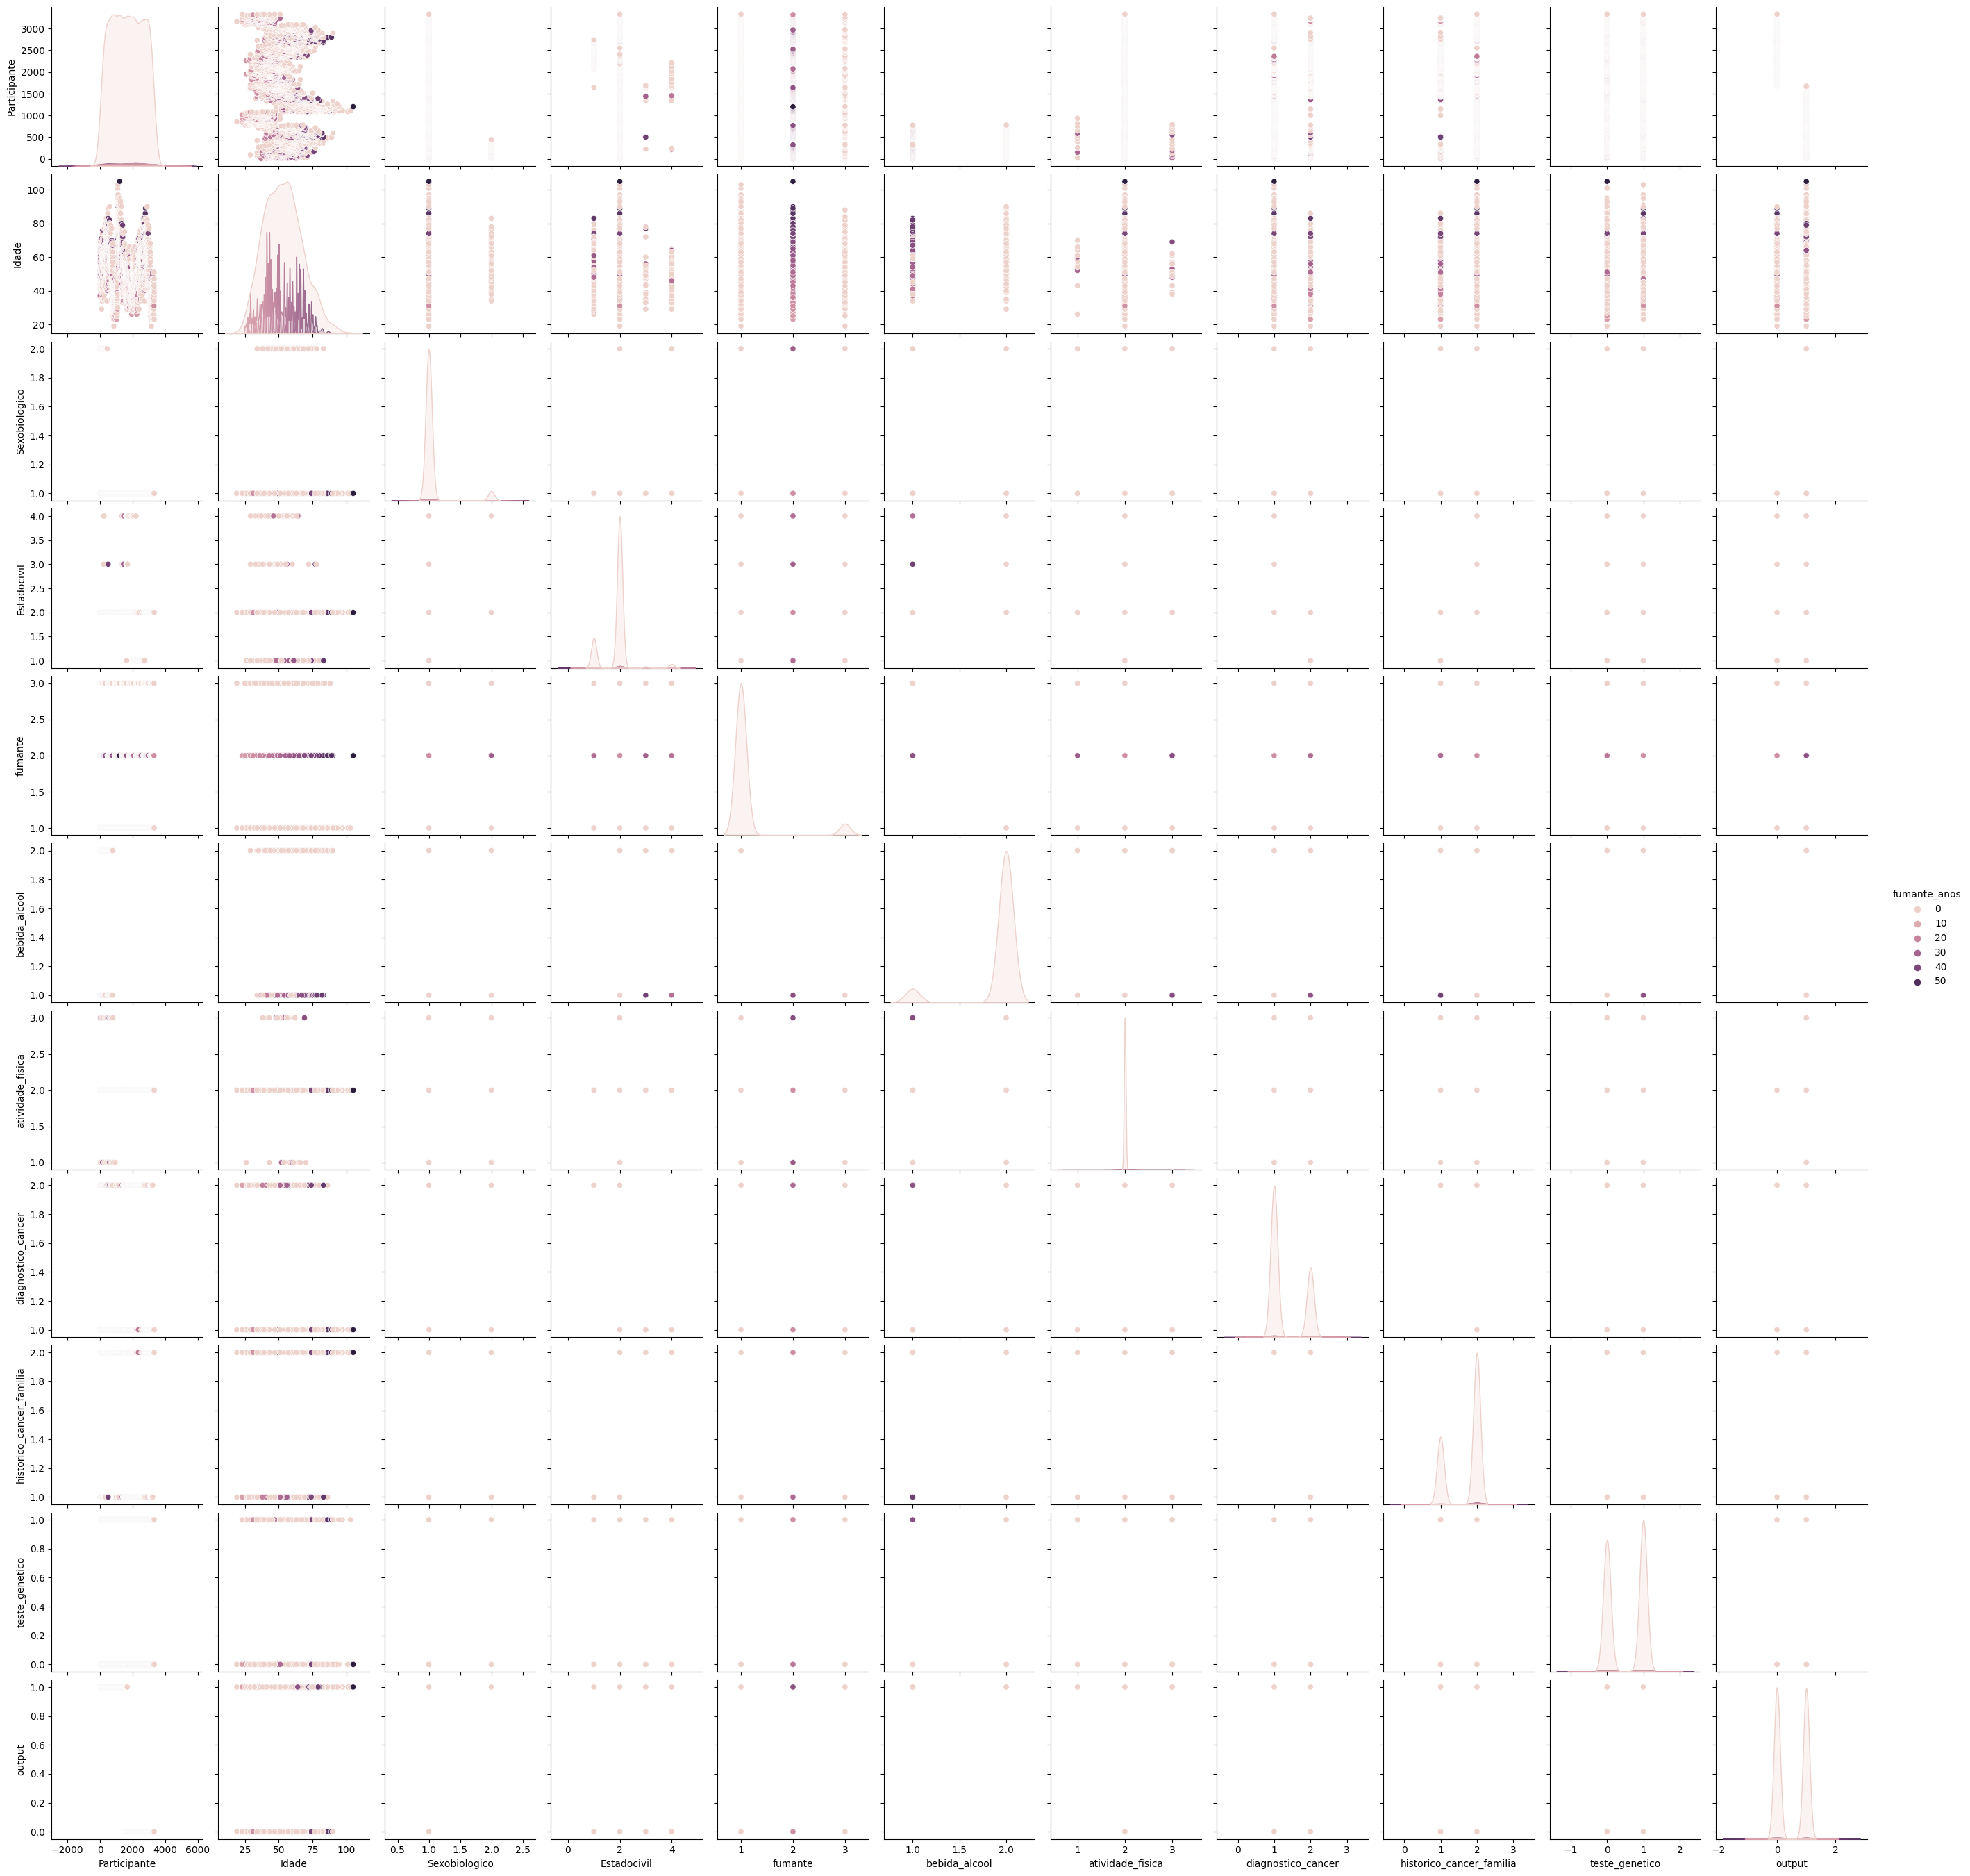

In [43]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataset, hue = "fumante_anos" );

## 4. Pré-Processamento de dados

### 4.1. Tratamento de Missings e Limpeza

  #### 4.1.1 Tratamento de Missings

Dados ausentes podem surgir por diversos motivos, como erros de coleta, falhas nos instrumentos de medição ou simplesmente porque certas informações não foram fornecidas para facilitar análises subsequentes.

Verificarei aqui quais variávies a quantidade encontram-se valores faltantes ou missing.

In [19]:
# verificando se existe nulls, valores faltantes no dataset
dataset.isnull().sum()

Participante                   0
Idade                          0
Sexobiologico                  0
Estadocivil                    0
fumante                        0
fumante_anos                   0
bebida_alcool               2487
atividade_fisica               0
diagnostico_cancer             0
historico_cancer_familia       0
teste_genetico                 0
output                         0
dtype: int64

2488 valores faltantes ou missing no atributo "bebida_alcool", que identifica se o participante consome bebida alcoolica.

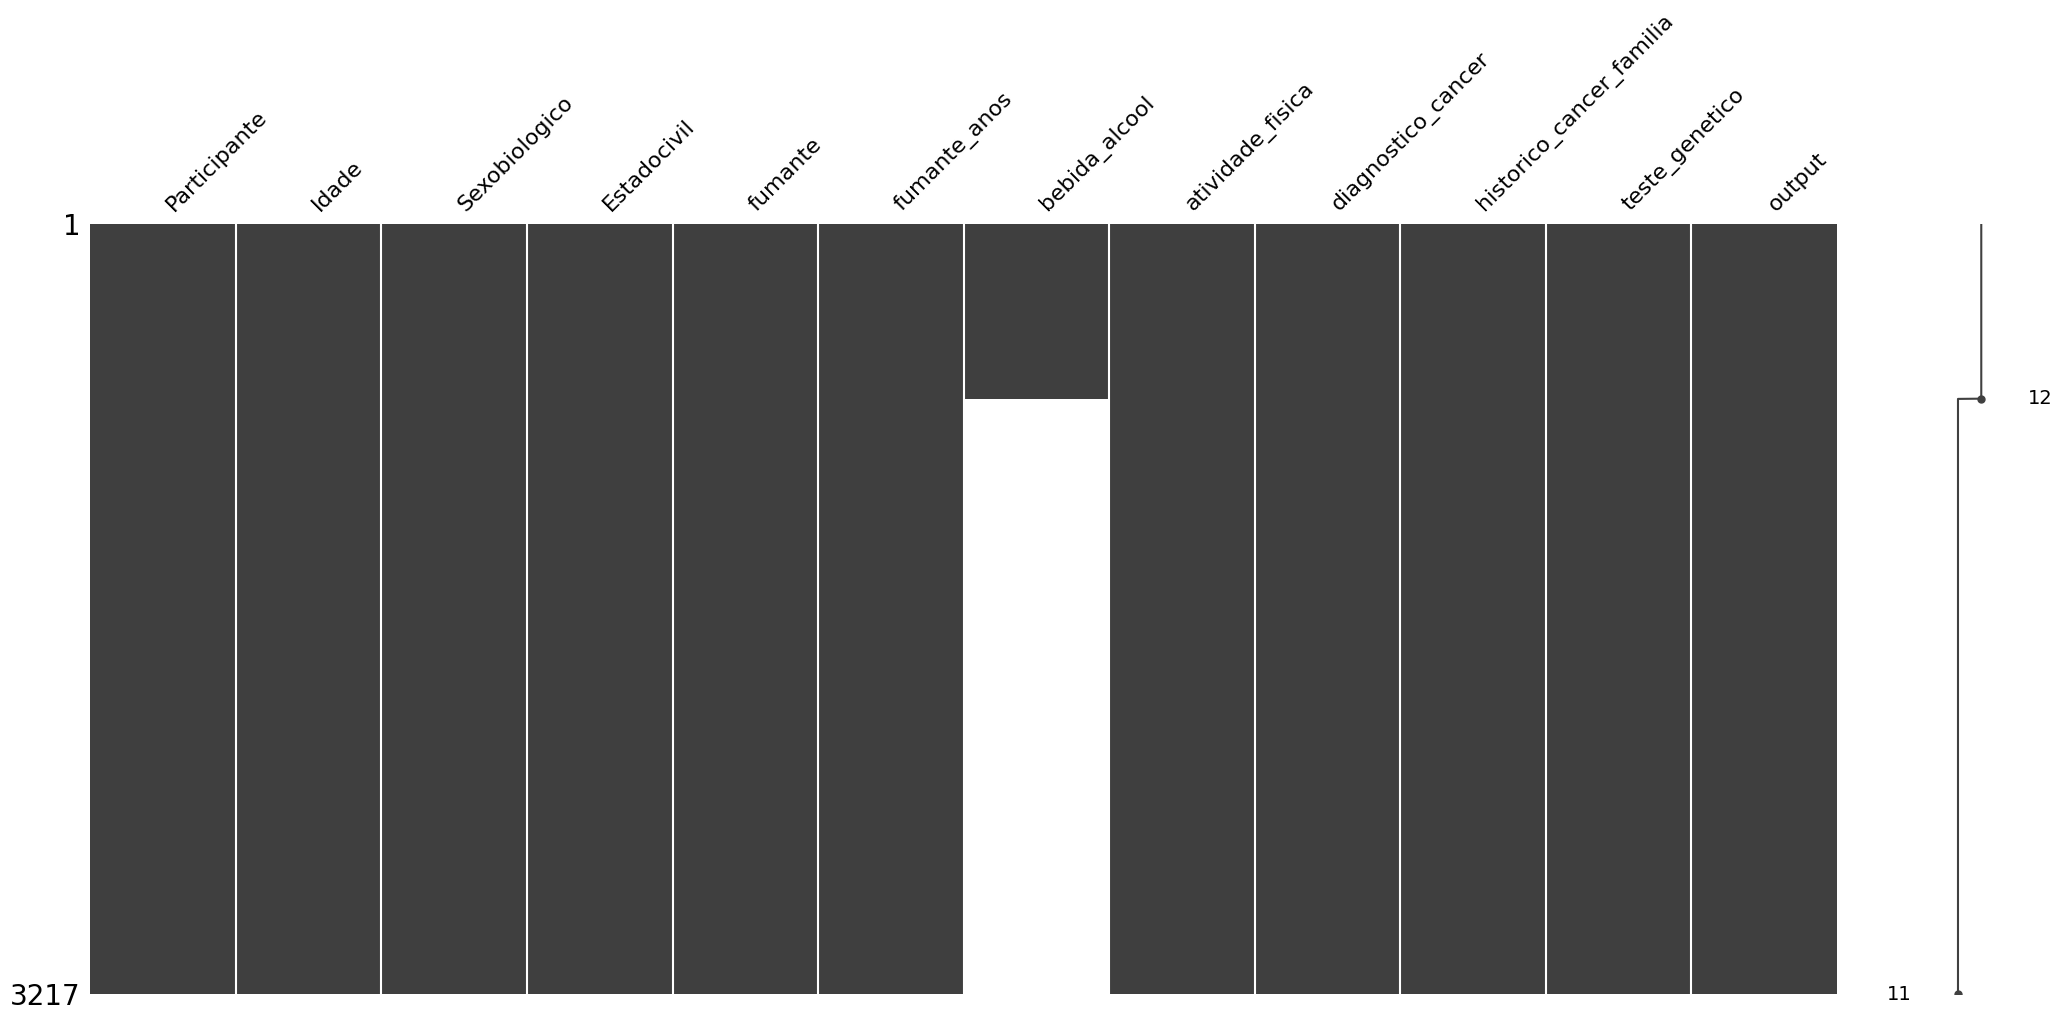

In [20]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# salvando um novo dataset para tratamento de missings, o novo dataset irá conter todas as colunas do dataset original
dadoSemMissings = dataset[col[:]]

# exibindo visualização matricial do dataset antes da manipulação
ms.matrix(dadoSemMissings);


No gráfico acima analisei os valores faltantes e assim tratar os dados por alguma imputação. Sendo assim, das possibilidades de tratamento, optei pela imputação do valor zero pelas características do meu dataset se tratar de  variáveis quantitativas.



<Axes: >

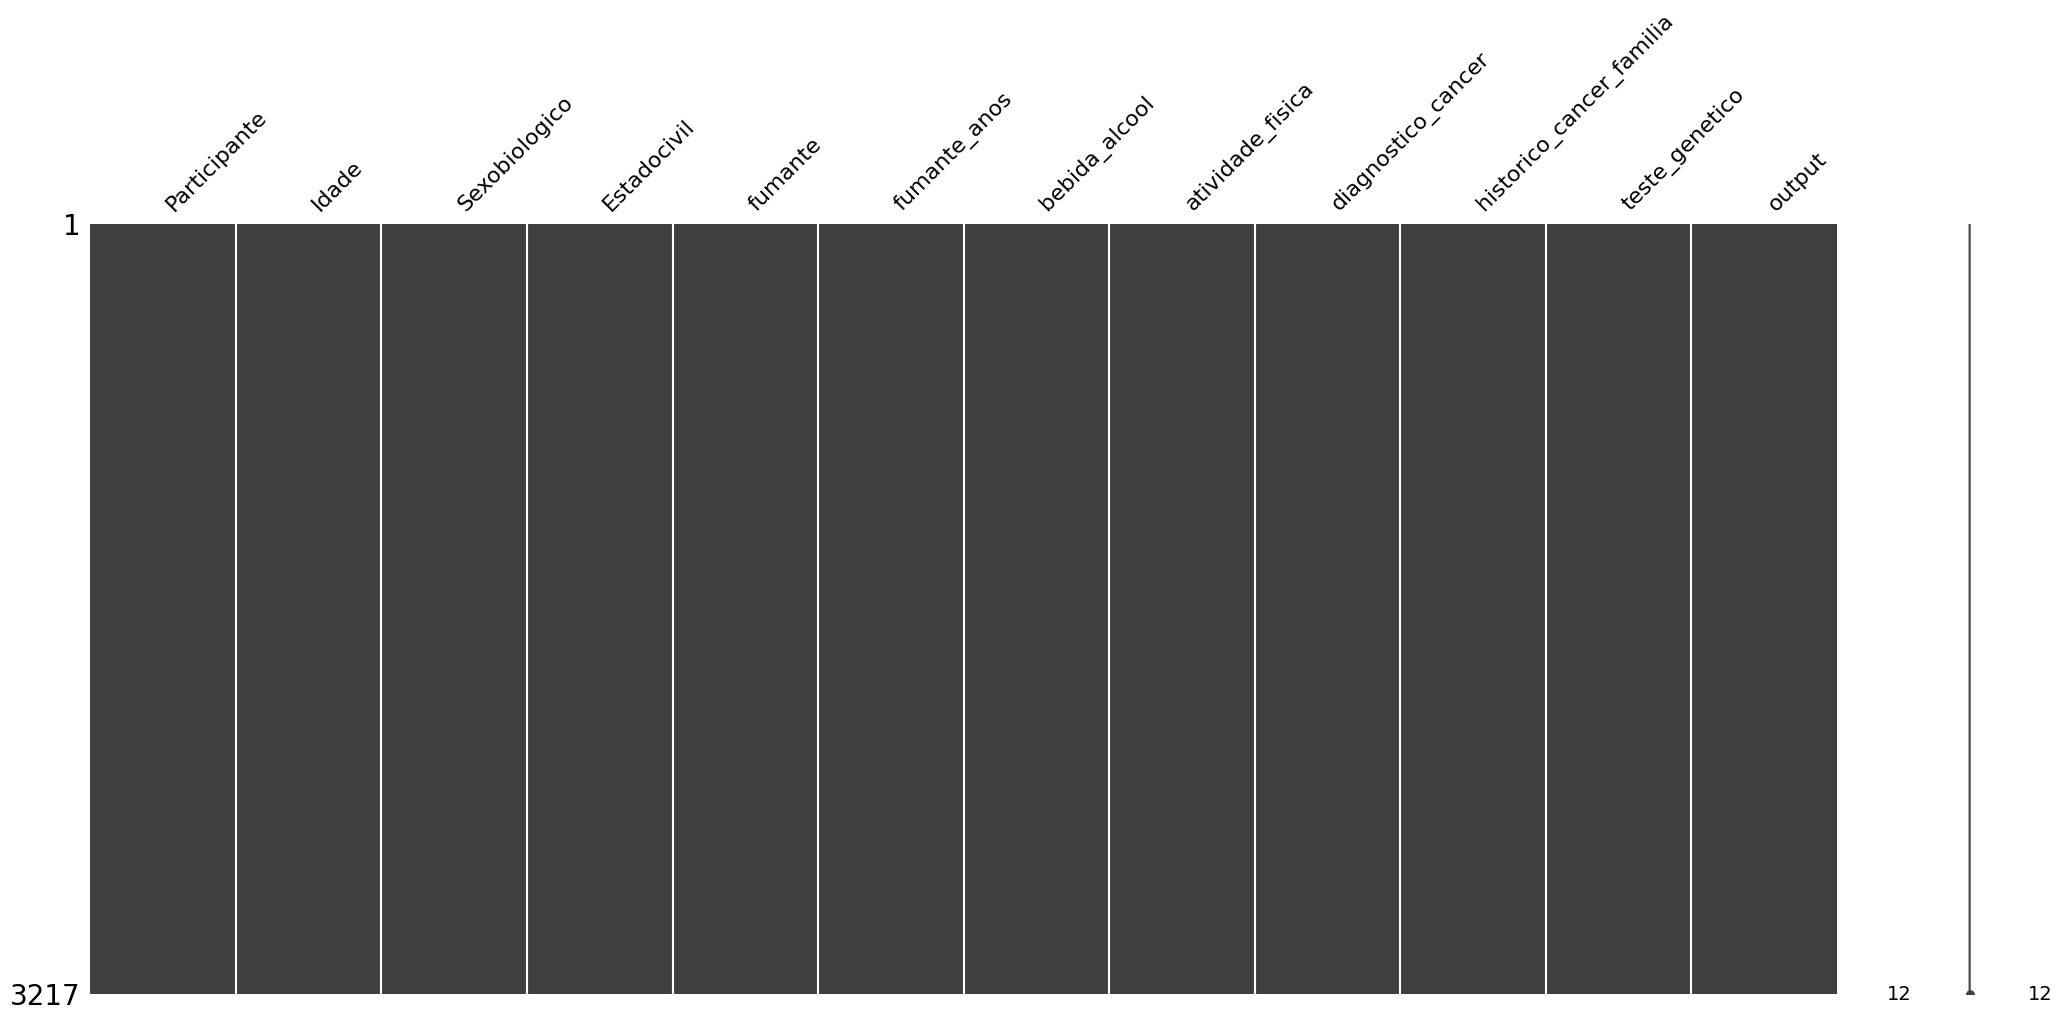

In [21]:
dadoSemMissings['bebida_alcool'].fillna(0, inplace=True)

# exibindo visualização matricial após a imputação
ms.matrix(dadoSemMissings)

In [22]:
# verificando valores faltantes no dataset após a imputação
dadoSemMissings.isna().sum()

Participante                0
Idade                       0
Sexobiologico               0
Estadocivil                 0
fumante                     0
fumante_anos                0
bebida_alcool               0
atividade_fisica            0
diagnostico_cancer          0
historico_cancer_familia    0
teste_genetico              0
output                      0
dtype: int64

Acima verifiquei que os valores faltantes ou missing no atributo "bebida_alcool" foi tratado.

In [23]:
#  describe fornece algumas estatísticas descritivas
dadoSemMissings.describe()

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
count,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.00000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000
mean,1677.278520,52.751943,1.056574,1.890270,1.324837,6.06590,0.385452,2.000933,1.312092,1.696301,0.536525,0.499845
std,955.969042,13.971364,0.231064,0.469951,0.574528,12.15499,0.744390,0.088163,0.463419,0.459926,0.498742,0.500078
min,4.000000,19.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,853.000000,42.000000,1.000000,2.000000,1.000000,0.00000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1674.000000,52.000000,1.000000,2.000000,1.000000,0.00000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000
75%,2505.000000,62.000000,1.000000,2.000000,2.000000,0.00000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,3331.000000,105.000000,2.000000,4.000000,3.000000,58.00000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000


In [24]:
# comando que lê as 50 primeiras linhas do dataset
dadoSemMissings.head(50)

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
0,4,63,1,2,3,0,1.0,2,2,1,1,1
1,5,37,1,2,2,21,1.0,2,1,2,1,1
2,11,41,1,2,1,0,2.0,2,2,1,1,1
3,12,56,1,2,1,0,2.0,2,1,2,1,1
4,14,57,2,2,1,0,2.0,2,1,2,1,1
5,16,57,2,2,1,0,2.0,2,1,2,0,1
6,17,56,2,2,1,0,2.0,2,2,2,0,1
7,18,44,2,2,1,0,2.0,2,2,2,1,1
8,19,52,1,2,2,29,1.0,2,1,2,1,1
9,20,57,1,2,2,32,1.0,2,1,2,1,1


  #### 4.1.2 Normalização

In [25]:
# transformação do dataframe para um vetor.
dadoSemMissings_normal = np.asarray(dadoSemMissings)

dadoSemMissings_normal

array([[4.000e+00, 6.300e+01, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.000e+00, 3.700e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [1.100e+01, 4.100e+01, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [3.329e+03, 2.300e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [3.330e+03, 4.700e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [3.331e+03, 3.900e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00]])

In [26]:
# Criando um objeto de normalização
scaler = MinMaxScaler()

# Ajustando o modelo e transformando os dados de uma vez , calcular a média e o desvio padrão e transformar os dados simultaneamente.
scaled = scaler.fit_transform(dadoSemMissings_normal)
print(scaled)


[[0.00000000e+00 5.11627907e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.00571085e-04 2.09302326e-01 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.10399760e-03 2.55813953e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [9.99398858e-01 4.65116279e-02 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.99699429e-01 3.25581395e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.32558140e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [27]:
 # Padronizando os dados tendo uma distribuição proxima  uma distribuição normal
dado_padronizado = StandardScaler().fit_transform(scaled)

print(dado_padronizado)

[[-1.75062013  0.73361843 -0.24488171 ... -1.51417729  0.92943372
   1.0003109 ]
 [-1.74957391 -1.12762013 -0.24488171 ...  0.66042465  0.92943372
   1.0003109 ]
 [-1.74329658 -0.84127573 -0.24488171 ... -1.51417729  0.92943372
   1.0003109 ]
 ...
 [ 1.72806669 -2.12982551 -0.24488171 ...  0.66042465  0.92943372
  -0.9996892 ]
 [ 1.72911291 -0.41175914 -0.24488171 ...  0.66042465 -1.07592395
  -0.9996892 ]
 [ 1.73015913 -0.98444793 -0.24488171 ...  0.66042465 -1.07592395
  -0.9996892 ]]


In [28]:

# Informa o cabeçalho das colunas para a Transformação do array em um DataFrame novamente
colunas_normal = ['Participante',	'Idade' , 'Sexobiologico',
           'Estadocivil',	'fumante',	'fumante_anos', 'bebida_alcool' ,
           'atividade_fisica', 'diagnostico_cancer',	'historico_cancer_familia' ,	'teste_genetico', 'output']

# Transformação do array em um DataFrame novamente já com os dados normalizados e padronizados
dado_transformados = pd.DataFrame(dado_padronizado, columns = colunas_normal)

dado_transformados

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnostico_cancer,historico_cancer_familia,teste_genetico,output
0,-1.750620,0.733618,-0.244882,0.233528,2.916173,-0.499124,0.825700,-0.010579,1.484649,-1.514177,0.929434,1.000311
1,-1.749574,-1.127620,-0.244882,0.233528,1.175344,1.228830,0.825700,-0.010579,-0.673560,0.660425,0.929434,1.000311
2,-1.743297,-0.841276,-0.244882,0.233528,-0.565485,-0.499124,2.169291,-0.010579,1.484649,-1.514177,0.929434,1.000311
3,-1.742250,0.232516,-0.244882,0.233528,-0.565485,-0.499124,2.169291,-0.010579,-0.673560,0.660425,0.929434,1.000311
4,-1.740158,0.304102,4.083604,0.233528,-0.565485,-0.499124,2.169291,-0.010579,-0.673560,0.660425,0.929434,1.000311
...,...,...,...,...,...,...,...,...,...,...,...,...
3212,1.725974,-0.912862,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,-1.075924,-0.999689
3213,1.727020,-0.125415,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,0.929434,-0.999689
3214,1.728067,-2.129826,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,0.929434,-0.999689
3215,1.729113,-0.411759,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,-1.075924,-0.999689


#### 4.1.3 Visualização de Informação após o tratamento de dados

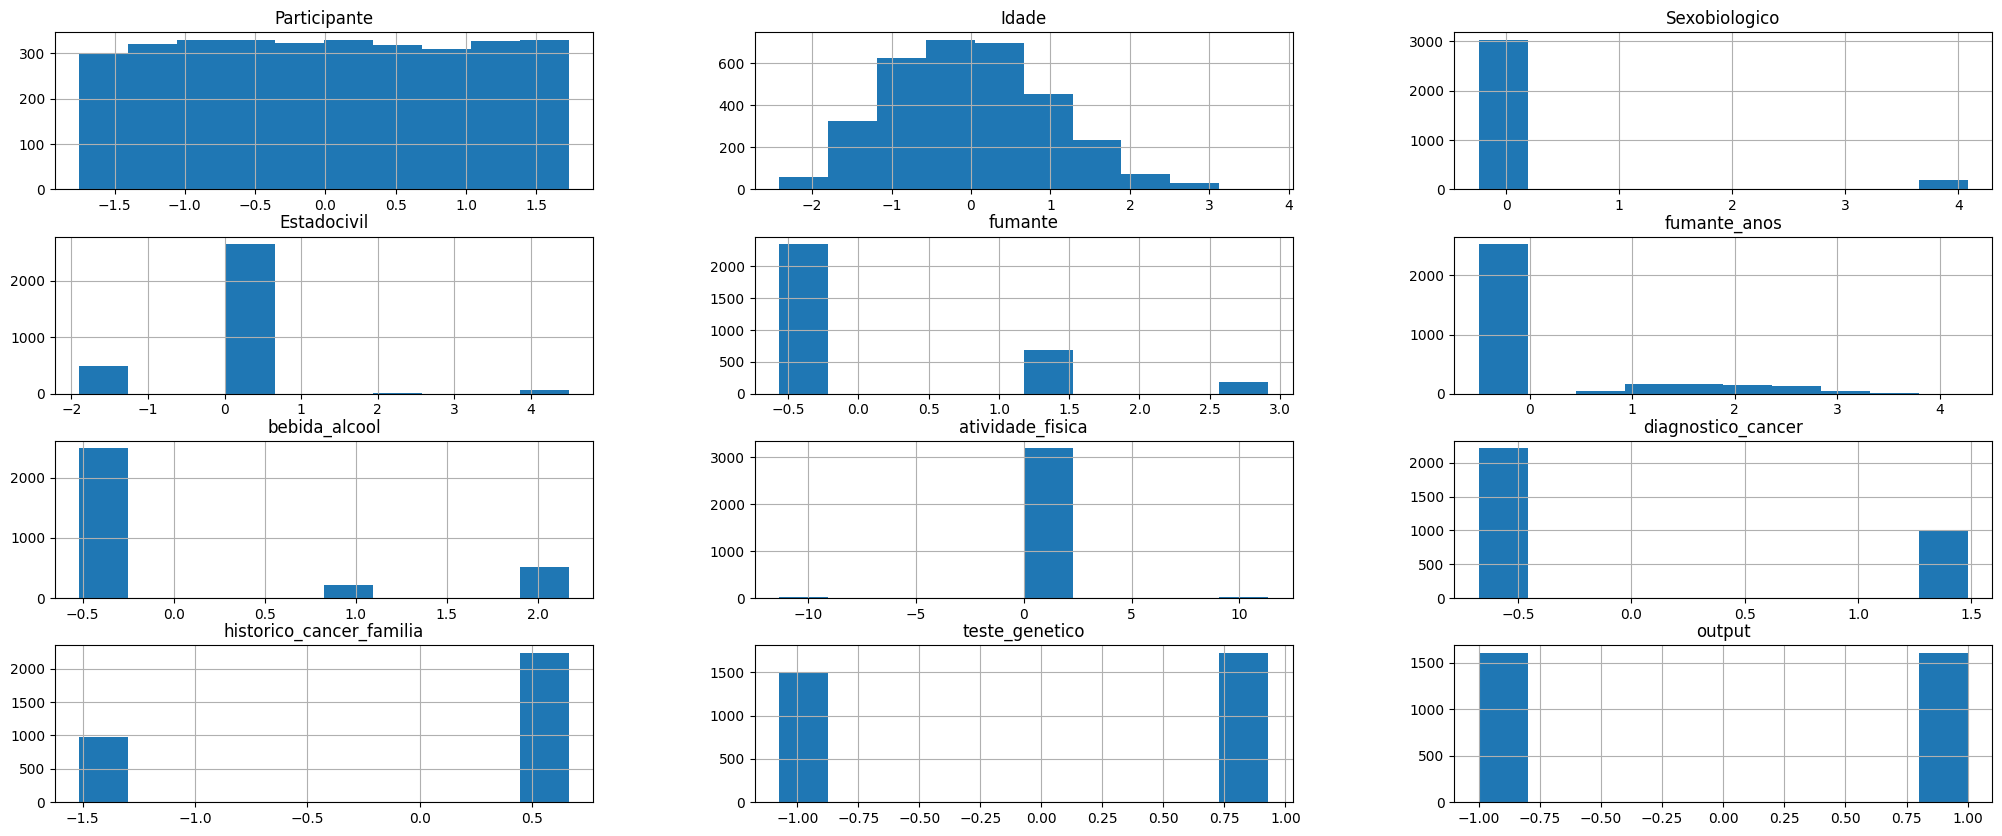

In [29]:
# Histograma dos dados transformados
dado_transformados.hist(figsize = (25,10))
plt.show()

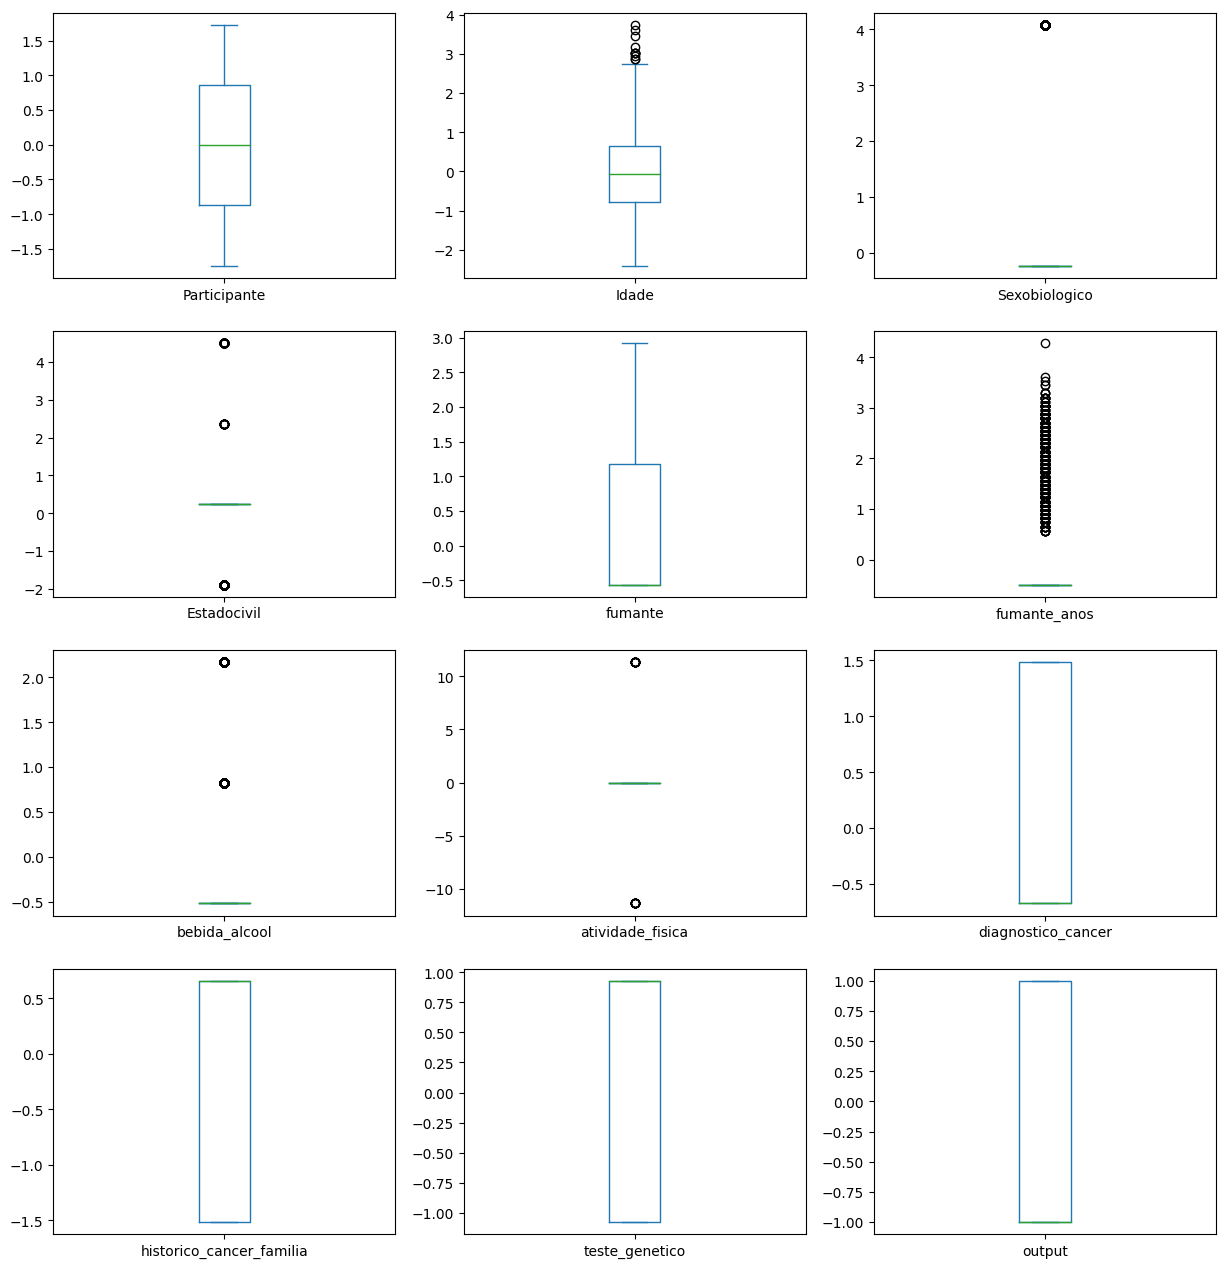

In [30]:
# Boxplot dos dados transformados
dado_transformados.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (15,20))
plt.show()

### 4.2. Separação em conjunto de treino e conjunto de teste

Na separação em conjunto de treino e conjunto de teste, usarei 70% do conjunto de dados para modelagem e os 30% para teste.

In [31]:
# Verificando total de linhas e colunas do dataset

dado_transformados.shape

(3217, 12)

In [44]:
# Dividindo os dados em conjuntos de treinamento e teste

# 'test_size' determina a proporção de dados que vai para o conjunto de teste (neste caso, 30%)
test_size = 0.30
#  valor fixo que garante que a divisão seja reproduzível
seed = 7

# jogando os dados do dataser em um array
array = dado_transformados.values

X = array[:,0:11]
y = array[:,11]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação


In [33]:
print ("Dados de treino X: \n\n", X_train)

Dados de treino X: 

 [[ 0.27381867 -0.76968964 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [-0.01284605 -0.05382865 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [ 0.63476512 -1.05603403 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 ...
 [ 0.73729483  0.73361843 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 [ 0.25707912 -1.48555062 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 [ 0.96014003  0.94837673 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]]


In [34]:
print ("Dados de treino Y: \n\n" , y_train)

Dados de treino Y: 

 [-0.9996892  1.0003109 -0.9996892 ... -0.9996892 -0.9996892 -0.9996892]


In [35]:
print ("Dados de teste X: \n\n", X_test)

Dados de teste X: 

 [[-0.84982333 -0.55493134 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 0.67138287 -0.48334524 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 1.34410336  0.30410184 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 ...
 [ 0.55315983 -0.91286183 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [-0.94398328 -0.55493134 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 0.0478348  -1.19920623 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]]


In [36]:
print ("Dados de teste Y: \n\n",y_test)

Dados de teste Y: 

 [ 1.0003109 -0.9996892 -0.9996892 -0.9996892 -0.9996892  1.0003109
  1.0003109  1.0003109 -0.9996892  1.0003109 -0.9996892 -0.9996892
  1.0003109  1.0003109  1.0003109 -0.9996892  1.0003109 -0.9996892
 -0.9996892 -0.9996892 -0.9996892  1.0003109  1.0003109  1.0003109
 -0.9996892 -0.9996892 -0.9996892 -0.9996892  1.0003109 -0.9996892
  1.0003109 -0.9996892  1.0003109 -0.9996892 -0.9996892 -0.9996892
  1.0003109  1.0003109 -0.9996892  1.0003109  1.0003109 -0.9996892
  1.0003109  1.0003109  1.0003109  1.0003109 -0.9996892 -0.9996892
  1.0003109  1.0003109  1.0003109 -0.9996892  1.0003109  1.0003109
 -0.9996892  1.0003109  1.0003109  1.0003109  1.0003109 -0.9996892
 -0.9996892 -0.9996892  1.0003109 -0.9996892  1.0003109  1.0003109
  1.0003109 -0.9996892  1.0003109  1.0003109 -0.9996892 -0.9996892
 -0.9996892 -0.9996892  1.0003109 -0.9996892  1.0003109 -0.9996892
  1.0003109  1.0003109 -0.9996892 -0.9996892  1.0003109  1.0003109
  1.0003109  1.0003109  1.0003109  1.0003

## Conclusão

A análise dos dados e Boas Práticas que teve como principal objetivo prever se um voluntário à um projeto de pesquisa se enquadra ao perfil de estudo do projeto de pesquisa, foi possível verificar falha na coleta dos critérios e assim tratar esta falha. Além disso, através deste MVP, foi possível realizar aálises para se obter diversas percepções sobre os dados, com a relação de histórico de câncer na família e o diagnostico de câncer no participante. Sendo assim, o trabalho trouxe uma importante contribuição na questão da automatização de seleção dos criterios de seleção na triagem dos projetos de pesquisa afim de predizer o quanto o conjunto de dados está associado ao diagnostico de Câncer no participante.

Para novas iterações/sprints pode-se incluir novos conjuntos de dados para um aumento da acurácia, conjunto este com novos critérios ou até mais especificos de seleção dos participantes como por exemplo , os resultados dos testes geneticos.

